In [94]:
import numpy as np
import pandas as pd

In [217]:
#load datasets
stats = pd.read_csv("datasets/nba_2017_players_stats.csv") 
salary = pd.read_csv("datasets/nba_2017_salary.csv")
#merge data sets based on name, drop na values
df1 = stats.merge(salary, on='NAME')
df2 = df1.dropna(axis=1)
#Features are Age, 3p, 2p, Fg%, MPG, FT%, AST, STL, BLK, Points
df3 = df2[["AGE", "FG%" , "3P", 
           "2P", "TRB", "AST", 
           "STL", "BLK", "POINTS", 
           "MPG"]]

features = ["AGE","FG%" , "3P", "2P", "TRB", "AST", "STL", "BLK", "POINTS", "MPG"]
fAvg = []
fMax = []
fMin = []
fRange = []
for f in features:
    fAvg.append(round(np.mean(df3[f]),2))
for f in features:
    fMax.append(round(np.amax(df3[f]),2))
for f in features:
    fMin.append(round(np.amin(df3[f]),2))
for i in range(len(fMax)):
    fRange.append(fMax[i] - fMin[i])
  

[40,
 0.75,
 12.800000000000001,
 11.199999999999999,
 2.0,
 2.6000000000000001,
 31.600000000000001,
 37.799999999999997]

In [248]:
#feature matrix with column of 1s
x = df3.values
#target vector
y = np.array(df2["SALARY"])
y = y.reshape(y.shape[0],1)
#transform Features

'''
for i in range(0,342):
    x[i] = (x[i] - fAvg[j])/fRange[j]


for i in range(0,342):
    x[i][0] = x[i][0] / fMax[0]
'''
  
a=np.ones((y.shape[0],1))
x=np.hstack((a , x))



In [249]:
#cost function for gradient descent
def compute_cost(x, y, beta, n):
    
    cost=np.sum((np.dot(x,beta)-y) ** 2)/(2*n)
    
    return cost

In [250]:
#gradient descent to optimize regression
def gradient_descent(x , y , learning_rate , beta , n , num_iters):
    for i in range(num_iters):
        # derivative vector is given by : X_train.Transpose *  (( X_train * betavector)- y ) 
        temp =   beta - (learning_rate/n) * np.dot(x.transpose(), (np.dot(x , beta)-y))
        beta = temp
        cost= compute_cost(x , y , beta , n)
             
            
            
    return beta

In [251]:
#multiple regression gradient descent
def multiple_linear_reg_model_gda(x , y , n , learning_rate , num_iters):
    #initialize paramaters
    beta= np.zeros((x.shape[1],1))
    
    #compute cost
    initial_cost=compute_cost(x , y , beta , n)
    #gradient descent
    beta= gradient_descent(x , y , learning_rate , beta , n , num_iters)
    
    final_cost=compute_cost(x , y , beta , n)
    return beta

In [252]:
learning_rate=0.001
num_iters=100000
# In place of None, call the multiple_linear_reg_model_gda.
n = y.shape[0]
beta = multiple_linear_reg_model_gda( x , y , n , learning_rate , num_iters)
beta

array([[-10035782.9154067 ],
       [   451983.99610885],
       [ -3452997.84461063],
       [   559833.90431817],
       [   338527.3786842 ],
       [  -433176.64421417],
       [  -191883.99917603],
       [   501148.2370944 ],
       [   -13589.91323928]])

In [253]:
#getting betas with the normal equation method. Our beta vector and
#the beta vector from the normal equation method should be similar
q = np.linalg.inv(np.dot(x.T,x))
w = np.dot(x.T,y)
beta_vec = np.dot(q,w)
beta_vec

array([[ -1.15925480e+07],
       [  4.82569033e+05],
       [ -1.96720882e+06],
       [  5.32471380e+05],
       [  3.30942135e+05],
       [ -4.12254657e+05],
       [ -1.77410571e+05],
       [  4.97479770e+05],
       [ -4.37267541e+03]])

In [254]:
#function to predict salary based on parameters
def predict(x,beta):
    yhat = np.dot(x,beta)
    return yhat
yhat = predict(x,beta)
yhatNormalMethod = predict(x,beta_vec)

In [255]:
#round values in predicted vectors
yhat = np.around(yhat,decimals=-3)
yhatNormalMethod = np.around(yhatNormalMethod,decimals=-3)

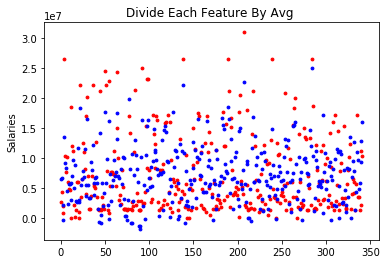

In [256]:
#plot predicted values and y to see simiarities
import matplotlib.pyplot as plt
x = np.arange(0,y.shape[0])
plt.scatter(x,y,color ='red',s=8)
#plt.scatter(y,yhat,color ='blue',s=8)
plt.scatter(x,yhatNormalMethod, color='blue',s=8)
plt.ylabel("Salaries")
plt.xlabel("")
plt.title("Divide Each Feature By Avg ")
plt.show()

In [257]:
#Calculating R^2
def calculateR2(y,yhat):
    ym = np.mean(y)
    rss = np.sum((y-yhat)**2)
    ess = np.sum((yhat-ym)**2)
    tss = np.sum((y-ym)**2)
    return ess/tss #R^2

rsq1 = calculateR2(y,yhat)
rsq2 = calculateR2(y,yhatNormalMethod)
print(rsq1) #0.516521578282
print(rsq2) #0.537377866618

0.516115265969
0.535697633348


In [258]:
#Min and max values for predicted set
yhatmax = np.amax(yhat) #25264000
yhatmin = np.amin(yhat) #-1231000
print(yhatmax,yhatmin)

25259000.0 -1202000.0
